In [ ]:
# Fltten the TASTE light curve

In [1]:
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import os
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

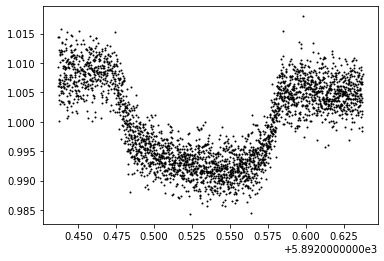

In [2]:
data = np.genfromtxt('Data_Files/XO_TASTE_aperture2.dat')
timepla = data[:,0]
flux = data[:,1]
plt.scatter(timepla, flux, s=1, color='black')
plt.show()


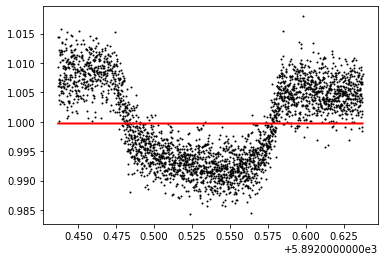

In [3]:
from wotan import flatten

flatten_lc, trend_lc = flatten(
    timepla,                 # Array of time values
    flux,                 # Array of flux values
    method='biweight',
    window_length=1.0,    # The length of the filter window in units of ``time``
    edge_cutoff=0.0,      # length (in units of time) to be cut off each edge.
    break_tolerance=0.0,  # Split into segments at breaks longer than that
    return_trend=True,    # Return trend and flattened light curve
    cval=3.0              # Tuning parameter for the robust estimators
    )

plt.scatter(timepla, flux, s=1, color='black')
plt.plot(timepla, trend_lc, color='red', linewidth=2)
plt.show()

plt.scatter(timepla, flatten_lc, s=1, color='black')
plt.show()

In [4]:
# We fold the lightcurve around the planetary period
# We also perform a binning of the lightcurve, with the only goal of COMPARE the different lightcurve
import matplotlib.pyplot as plt;

quality_selection = (flatten_lc[:] < 1.01)


period = 2.61585922
time_of_transit = 2455565.546480
plt.figure(figsize=(12,8))
phase =  (((timepla + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 
phase_index = np.argsort(phase[quality_selection])

curve_length = len(phase_index)
n_bins = 15 # binnning every 30 minutes
n_reshape = (curve_length//n_bins)*n_bins

FQ = flatten_lc[quality_selection]
print(len(FQ))
print(len(flatten_lc))
fphase = phase[quality_selection]
phase_binned = np.mean(phase[phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
flux_binned = np.mean(flatten_lc[phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
ferr_binned = np.std(flatten_lc[phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)/np.sqrt(n_bins)
plt.errorbar(phase_binned, flux_binned, ferr_binned, ms=5, fmt='o', c='blue', label='mean')
plt.scatter(fphase, FQ, c='grey', s=4, label='TASTE data', alpha=0.15)

plt.xlabel('phase [Days]')
plt.ylabel('Normalized Flux')
plt.xlim(min(phase_binned), max(phase_binned))
plt.ylim(0.98, 1.02)
plt.legend()
plt.savefig('XO_TASTE_flatten.pdf')
plt.show()
print(min(phase_binned)+0.015)

ftime = ((fphase+0.05)/period) + time_of_transit 
print(ftime)

2708
2905


-0.03505026868632521
[2455565.54639535 2455565.54640652 2455565.54642783 ... 2455565.57566404
 2455565.57568231 2455565.57569145]


In [ ]:
fileout = open('Data_Files/XO_TASTE_Flatten_aperture2.dat', 'w')
for b, f, e in zip(timepla, flux_binned, ferr_binned):
    fileout.write('{0:12.9f} {1:12.9f} {2:12.9f} 0 \n'.format(b,f,e))
fileout.close()

fileout = open('Data_Files/XO_TASTE-phase_Flatten_aperture2.dat', 'w')
for b, f, e in zip(phase_binned, flux_binned, ferr_binned):
    fileout.write('{0:12.9f} {1:12.9f} {2:12.9f} 0 \n'.format(b,f,e))
fileout.close()